In [10]:
import pandas as pd
from numpy import nan

In [3]:
#loading the dataset
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [12]:
# mark all missing values
dataset.replace('?',nan, inplace=True)

In [13]:
#add a column for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [9]:
#save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [15]:
#loading the new file
new_df = pd.read_csv('household_power_consumption.csv')
new_df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


# Patterns in Observations Over Time

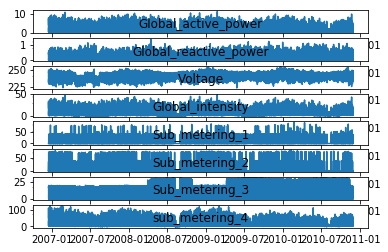

In [17]:
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
    pyplot.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    pyplot.plot(dataset[name])
    pyplot.title(name, y=0)
pyplot.show()

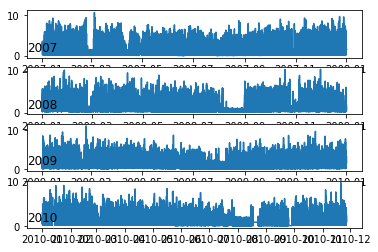

In [18]:
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]
# get all observations for the year
    result = dataset[str(year)]
# plot the active power for the year
    pyplot.plot(result['Global_active_power'])
# add a title to the subplot
    pyplot.title(str(year), y=0, loc='left')
pyplot.show()

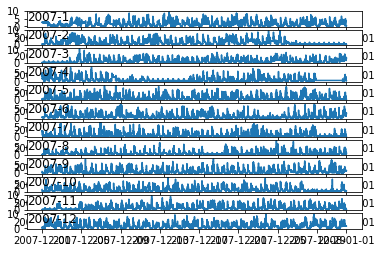

In [19]:
# monthly line plots
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
# prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
# determine the month to plot
    month = '2007-' + str(months[i])
# get all observations for the month
    result = dataset[month]
# plot the active power for the month
    pyplot.plot(result['Global_active_power'])
# add a title to the subplot
    pyplot.title(month, y=0, loc='left')
pyplot.show()

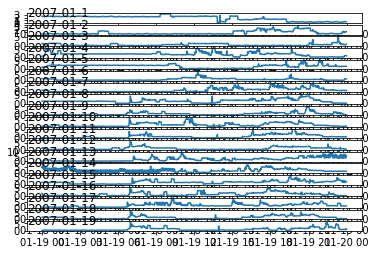

In [20]:
#daily line plots of power consumption
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
# prepare subplot
    ax = pyplot.subplot(len(days), 1, i+1)
# determine the day to plot
    day = '2007-01-' + str(days[i])
# get all observations for the day
    result = dataset[day]
# plot the active power for the day
    pyplot.plot(result['Global_active_power'])
# add a title to the subplot
    pyplot.title(day, y=0, loc='left')
pyplot.show()

Time Series Data Distributions
#We can investigate the distributions of the data by reviewing histograms.


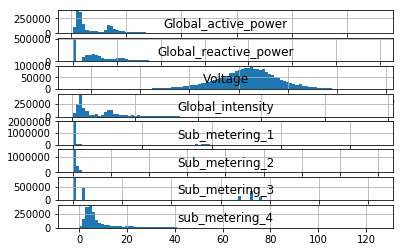

In [21]:
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
    pyplot.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    dataset[name].hist(bins=100)
    pyplot.title(name, y=0)
pyplot.show()

In [22]:
#Global Active power is bimodal from the plot
#to investigate further, consider distribution of active power consuption for the 4 yrs of data

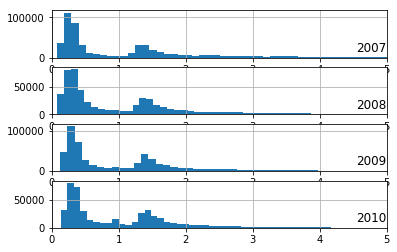

In [23]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
# prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]
# get all observations for the year
    result = dataset[str(year)]
# plot the active power for the year
    result['Global_active_power'].hist(bins=100)
# zoom in on the distribution
    ax.set_xlim(0, 5)
# add a title to the subplot
    pyplot.title(str(year), y=0, loc='right')
pyplot.show()